In [61]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [62]:
#load dataset
df = pd.read_csv("/content/superstore.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [63]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [64]:
#check for missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [65]:
df['Country'].unique()

array(['United States'], dtype=object)

In [66]:
#encode categorical variables
label_encoders = {}
for column in ['Ship Mode', 'Segment', 'City', 'Country', 'State', 'Region', 'Category', 'Sub-Category']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,2,CG-12520,Claire Gute,0,0,194,...,42420,2,FUR-BO-10001798,0,4,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,2,CG-12520,Claire Gute,0,0,194,...,42420,2,FUR-CH-10000454,0,5,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,2,DV-13045,Darrin Van Huff,1,0,266,...,90036,3,OFF-LA-10000240,1,10,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,3,SO-20335,Sean O'Donnell,0,0,153,...,33311,2,FUR-TA-10000577,0,16,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,3,SO-20335,Sean O'Donnell,0,0,153,...,33311,2,OFF-ST-10000760,1,14,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


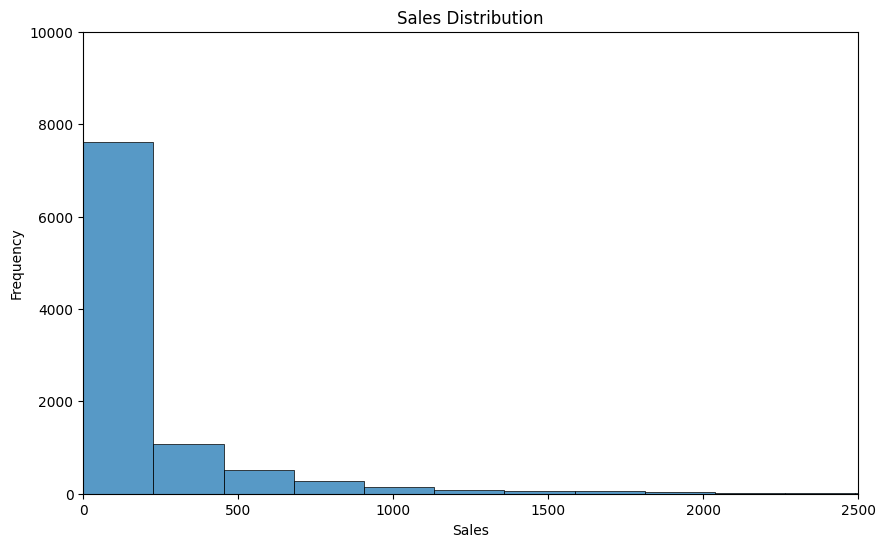

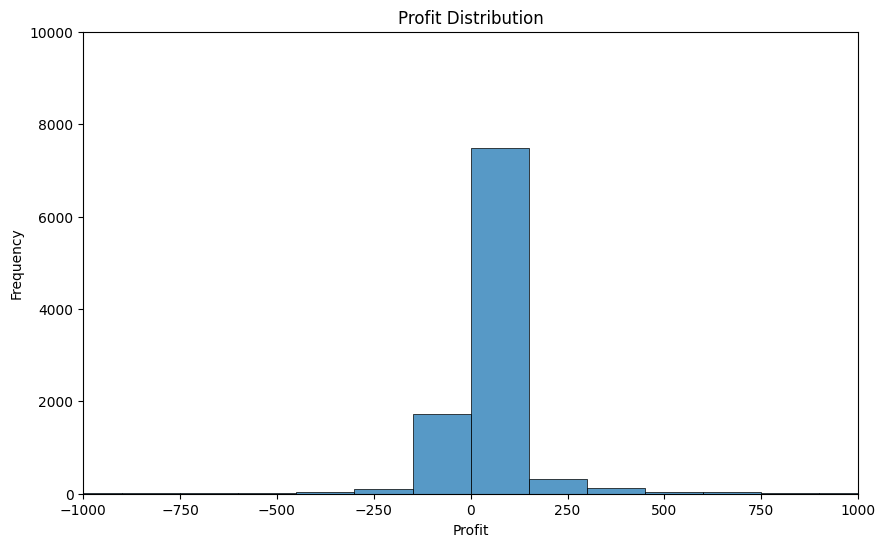

In [67]:
#plot sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=100)
plt.title('Sales Distribution')
plt.xlim(0, 2500)
plt.ylim(0, 10000)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

#plot profit distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=100)
plt.title('Profit Distribution')
plt.xlim(-1000, 1000)
plt.ylim(0, 10000)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

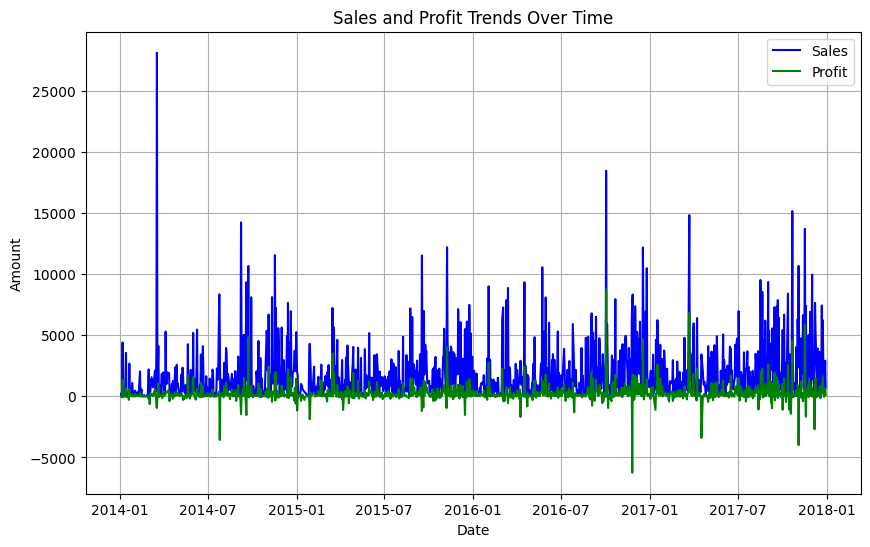

In [68]:
#convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

#group by 'Order Date' and calculate total sales and profit for each date
sales_profit_over_time = df.groupby('Order Date').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

#plot sales and profit trends over time
plt.figure(figsize=(10, 6))
plt.plot(sales_profit_over_time['Order Date'], sales_profit_over_time['Sales'], label='Sales', color='blue')
plt.plot(sales_profit_over_time['Order Date'], sales_profit_over_time['Profit'], label='Profit', color='green')

plt.title('Sales and Profit Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

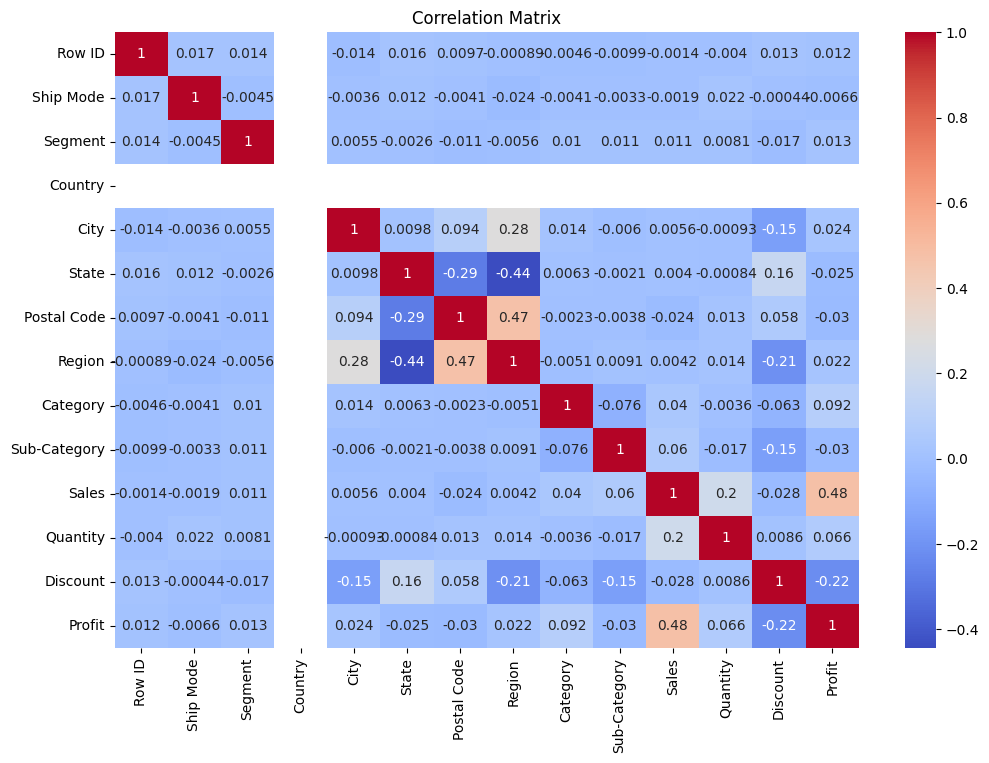

In [70]:
#correlation analysis
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
correlation_matrix = df_numeric.corr()
sales_correlation = correlation_matrix['Sales'].drop('Sales').abs().sort_values(ascending=False)
profit_correlation = correlation_matrix['Profit'].drop('Profit').abs().sort_values(ascending=False)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [71]:
print(sales_correlation)
print(profit_correlation)

Profit          0.479064
Quantity        0.200795
Sub-Category    0.059843
Category        0.040077
Discount        0.028190
Postal Code     0.023854
Segment         0.010866
City            0.005592
Region          0.004216
State           0.004015
Ship Mode       0.001887
Row ID          0.001359
Country              NaN
Name: Sales, dtype: float64
Sales           0.479064
Discount        0.219487
Category        0.091506
Quantity        0.066253
Postal Code     0.029961
Sub-Category    0.029503
State           0.025315
City            0.024217
Region          0.022216
Segment         0.013355
Row ID          0.012497
Ship Mode       0.006619
Country              NaN
Name: Profit, dtype: float64


In [72]:
# There is only one value for Country (United States). This explains the blank intersection.

# Features for profit: Sales, Discount, Category, Quantity, Postal Code, Sub-Category, State, City, Region
# Features for sale: Profit, Quantity, Sub-Category, Category, Discount, Postal Code, Segment

# Predicting Sales and Profit

In [73]:
#define features and target variable for profit prediction
X_profit = df[['Sales', 'Discount', 'Category', 'Quantity', 'Postal Code', 'Sub-Category', 'State', 'City', 'Region']]
y_profit = df['Profit']
#split the data into training and testing sets
X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(X_profit, y_profit, test_size=0.2, random_state=18)

#define features and target variable
X_sales = df[['Profit', 'Quantity', 'Sub-Category', 'Category', 'Discount', 'Postal Code', 'Segment']]
y_sales = df['Sales']
#split the data into training and testing sets
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X_sales, y_sales, test_size=0.2, random_state=18)

In [74]:
#normalization
scaler = StandardScaler()

X_train_sales = scaler.fit_transform(X_train_sales)
X_test_sales = scaler.transform(X_test_sales)

X_train_profit = scaler.fit_transform(X_train_profit)
X_test_profit = scaler.transform(X_test_profit)

In [75]:
model_sales = Sequential()

# NN
model_sales.add(Dense(units=64, input_dim=X_train_sales.shape[1], activation='relu'))
model_sales.add(Dropout(0.2))
model_sales.add(Dense(units=128, activation='relu'))
model_sales.add(Dropout(0.2))
model_sales.add(Dense(units=64, activation='relu'))
model_sales.add(Dropout(0.2))
model_sales.add(Dense(units=32, activation='relu'))
model_sales.add(Dropout(0.2))
# Output layer
model_sales.add(Dense(units=1, activation='linear'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model_sales.compile(optimizer=optimizer, loss='mean_absolute_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [76]:
model_profit = Sequential()

# NN
model_profit.add(Dense(units=64, input_dim=X_train_profit.shape[1], activation='relu'))
model_profit.add(Dropout(0.2))
model_profit.add(Dense(units=128, activation='relu'))
model_profit.add(Dropout(0.2))
model_profit.add(Dense(units=64, activation='relu'))
model_profit.add(Dropout(0.2))
model_profit.add(Dense(units=32, activation='relu'))
model_profit.add(Dropout(0.2))
# Output layer
model_sales.add(Dense(units=1, activation='linear'))

# Compile the model
optimizer = Adam(learning_rate=0.00001)
model_profit.compile(optimizer=optimizer, loss='mean_absolute_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [83]:
#find the optimal model
#initialize models
lr_sales = LinearRegression()
dt_sales = DecisionTreeRegressor(random_state=18)
rf_sales = RandomForestRegressor(random_state=18)
xgb_sales = XGBRegressor(learning_rate=0.4, random_state=18)

lr_profit = LinearRegression()
dt_profit = DecisionTreeRegressor(random_state=18)
rf_profit = RandomForestRegressor(random_state=18)
xgb_profit = XGBRegressor(learning_rate=0.5, random_state=18)

#train models on sales data
lr_sales.fit(X_train_sales, y_train_sales)
dt_sales.fit(X_train_sales, y_train_sales)
rf_sales.fit(X_train_sales, y_train_sales)
xgb_sales.fit(X_train_sales, y_train_sales)
history_sales = model_sales.fit(X_train_sales, y_train_sales, epochs=50, batch_size=32, verbose=2, validation_split=0.2, callbacks=[early_stopping])

#train models on profit data
lr_profit.fit(X_train_profit, y_train_profit)
dt_profit.fit(X_train_profit, y_train_profit)
rf_profit.fit(X_train_profit, y_train_profit)
xgb_profit.fit(X_train_profit, y_train_profit)
history_profit = model_profit.fit(X_train_profit, y_train_profit, epochs=50, batch_size=32, verbose=2, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
200/200 - 2s - loss: 107.0540 - val_loss: 102.3584 - 2s/epoch - 10ms/step
Epoch 2/50
200/200 - 2s - loss: 105.1526 - val_loss: 101.8771 - 2s/epoch - 9ms/step
Epoch 3/50
200/200 - 1s - loss: 104.8013 - val_loss: 101.9172 - 1s/epoch - 7ms/step
Epoch 4/50
200/200 - 1s - loss: 106.6037 - val_loss: 102.2020 - 899ms/epoch - 4ms/step
Epoch 5/50
200/200 - 1s - loss: 103.2365 - val_loss: 101.5697 - 969ms/epoch - 5ms/step
Epoch 6/50
200/200 - 1s - loss: 103.0204 - val_loss: 100.9813 - 860ms/epoch - 4ms/step
Epoch 7/50
200/200 - 1s - loss: 103.2627 - val_loss: 101.7215 - 1s/epoch - 5ms/step
Epoch 8/50
200/200 - 1s - loss: 102.9562 - val_loss: 102.1325 - 1s/epoch - 5ms/step
Epoch 9/50
200/200 - 1s - loss: 102.7868 - val_loss: 101.0480 - 986ms/epoch - 5ms/step
Epoch 10/50
200/200 - 1s - loss: 100.3694 - val_loss: 100.8884 - 1s/epoch - 5ms/step
Epoch 11/50
200/200 - 1s - loss: 101.6583 - val_loss: 100.1642 - 1s/epoch - 5ms/step
Epoch 12/50
200/200 - 1s - loss: 101.8490 - val_loss: 100.253

In [84]:
#define evaluation metrics
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

In [85]:
#make predictions on test data
y_pred_sales_lr = lr_sales.predict(X_test_sales)
y_pred_sales_dt = dt_sales.predict(X_test_sales)
y_pred_sales_rf = rf_sales.predict(X_test_sales)
y_pred_sales_xg = xgb_sales.predict(X_test_sales)
loss_sales = model_sales.evaluate(X_test_sales, y_test_sales)

y_pred_profit_lr = lr_profit.predict(X_test_profit)
y_pred_profit_dt = dt_profit.predict(X_test_profit)
y_pred_profit_rf = rf_profit.predict(X_test_profit)
y_pred_profit_xg = xgb_profit.predict(X_test_profit)
loss_profit = model_profit.evaluate(X_test_profit, y_test_profit)

#evaluate the sales model
print("Sales Prediction Model Evaluation:")
print("Linear Regression MAE:", evaluate_model(y_test_sales, y_pred_sales_lr)[0])
print("Decision Tree MAE:", evaluate_model(y_test_sales, y_pred_sales_dt)[0])
print("Random Forest MAE:", evaluate_model(y_test_sales, y_pred_sales_rf)[0])
print("XGBoost MAE:", evaluate_model(y_test_sales, y_pred_sales_xg)[0])
print(f'Neural Network MAE: {loss_sales}')

#evaluate the profit model
print("Profit Prediction Model Evaluation:")
print("Linear Regression MAE:", evaluate_model(y_test_profit, y_pred_profit_lr)[0])
print("Decision Tree MAE:", evaluate_model(y_test_profit, y_pred_profit_dt)[0])
print("Random Forest MAE:", evaluate_model(y_test_profit, y_pred_profit_rf)[0])
print("XGBoost MAE:", evaluate_model(y_test_profit, y_pred_profit_xg)[0])
print(f'Neural Network MAE: {loss_profit}')

63/63 [==============================] - 0s 2ms/step - loss: 53.6353
Sales Prediction Model Evaluation:
Linear Regression MAE: 233.9510652168703
Decision Tree MAE: 87.67495277638818
Random Forest MAE: 73.78556467033518
XGBoost MAE: 87.61363738020361
Neural Network MAE: 97.77672576904297
Profit Prediction Model Evaluation:
Linear Regression MAE: 65.27013739891684
Decision Tree MAE: 33.37024137068534
Random Forest MAE: 25.084725885139
XGBoost MAE: 23.215185391286425
Neural Network MAE: 53.63529968261719


In [86]:
# Calculate MAE for each baseline model
mae_sales_lr, _, _ = evaluate_model(y_test_sales, y_pred_sales_lr)
mae_sales_dt, _, _ = evaluate_model(y_test_sales, y_pred_sales_dt)
mae_sales_rf, _, _ = evaluate_model(y_test_sales, y_pred_sales_rf)
mae_sales_xg, _, _ = evaluate_model(y_test_sales, y_pred_sales_xg)

# Calculate MAE for each baseline model
mae_profit_lr, _, _ = evaluate_model(y_test_profit, y_pred_profit_lr)
mae_profit_dt, _, _ = evaluate_model(y_test_profit, y_pred_profit_dt)
mae_profit_rf, _, _ = evaluate_model(y_test_profit, y_pred_profit_rf)
mae_profit_xg, _, _ = evaluate_model(y_test_profit, y_pred_profit_xg)

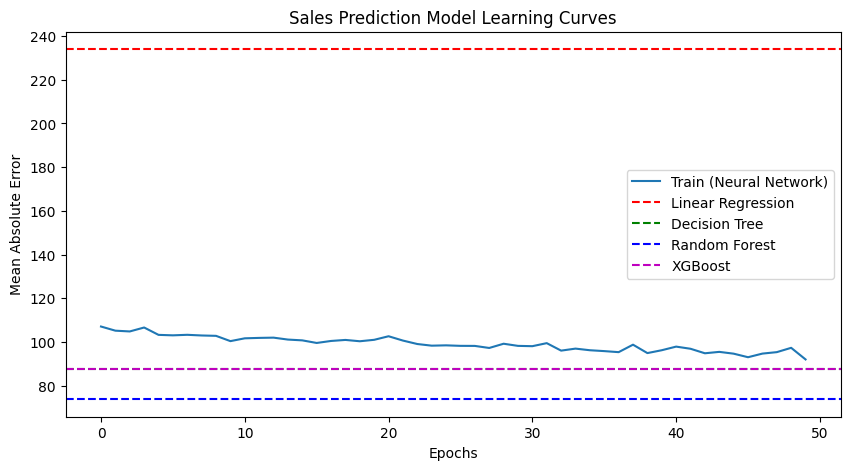

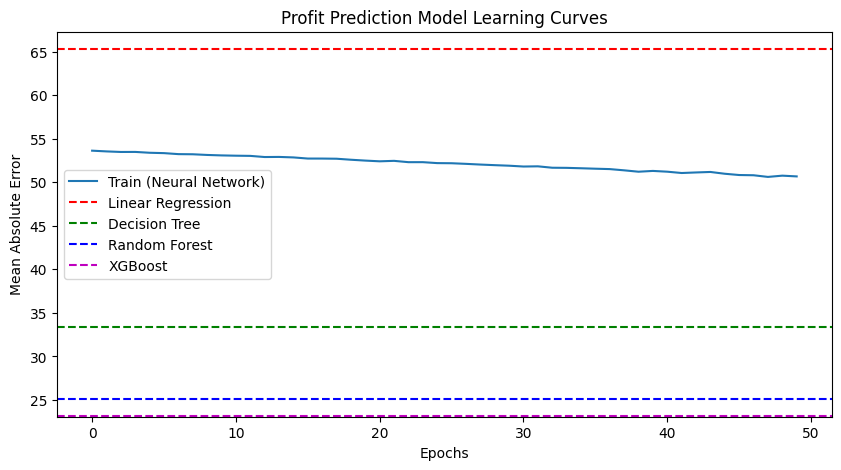

In [87]:
# Plot learning curves for sales prediction
plt.figure(figsize=(10, 5))
plt.plot(history_sales.history['loss'], label='Train (Neural Network)')
plt.axhline(y=mae_sales_lr, color='r', linestyle='--', label='Linear Regression')
plt.axhline(y=mae_sales_dt, color='g', linestyle='--', label='Decision Tree')
plt.axhline(y=mae_sales_rf, color='b', linestyle='--', label='Random Forest')
plt.axhline(y=mae_sales_xg, color='m', linestyle='--', label='XGBoost')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Sales Prediction Model Learning Curves')
plt.legend()
plt.show()

# Plot learning curves for profit prediction
plt.figure(figsize=(10, 5))
plt.plot(history_profit.history['loss'], label='Train (Neural Network)')
plt.axhline(y=mae_profit_lr, color='r', linestyle='--', label='Linear Regression')
plt.axhline(y=mae_profit_dt, color='g', linestyle='--', label='Decision Tree')
plt.axhline(y=mae_profit_rf, color='b', linestyle='--', label='Random Forest')
plt.axhline(y=mae_profit_xg, color='m', linestyle='--', label='XGBoost')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Profit Prediction Model Learning Curves')
plt.legend()
plt.show()

MAE for the XGBoost Sales Model: 87.61363738020361
MAE for the XGBoost Profit Model: 22.950513149800514


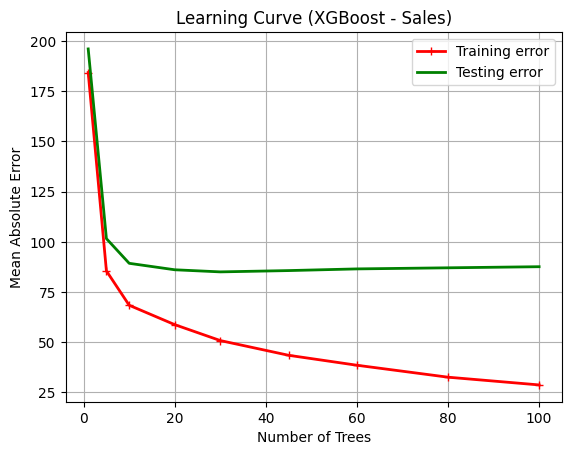

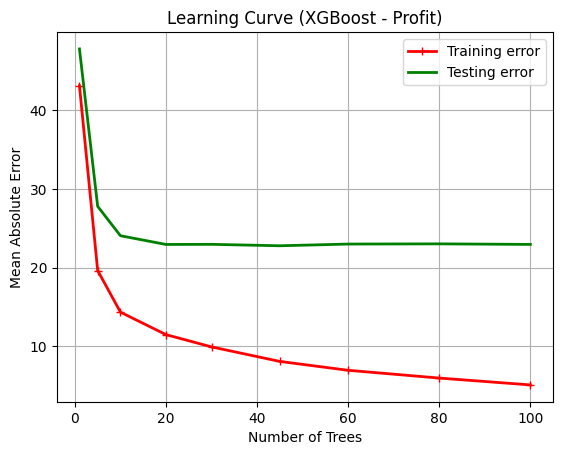

In [88]:
# Calculate learning curve with number of trees for XGBoost
def calculate_learning_curve_with_trees(model_class, X_train, y_train, X_test, y_test, tree_numbers):
    train_errors = []
    test_errors = []

    for n_trees in tree_numbers:
        model = model_class(n_estimators=n_trees, learning_rate=0.4, random_state=18)
        model.fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_absolute_error(y_train, y_train_predict))
        test_errors.append(mean_absolute_error(y_test, y_test_predict))

    return train_errors, test_errors

# Define number of trees to evaluate
tree_numbers = [1, 5, 10, 20, 30, 45, 60, 80, 100]

# XGBoost for Sales
train_errors_xgb_sales, test_errors_xgb_sales = calculate_learning_curve_with_trees(
    XGBRegressor, X_train_sales, y_train_sales, X_test_sales, y_test_sales, tree_numbers
)

# XGBoost for Profit
train_errors_xgb_profit, test_errors_xgb_profit = calculate_learning_curve_with_trees(
    XGBRegressor, X_train_profit, y_train_profit, X_test_profit, y_test_profit, tree_numbers
)
# Print the MAE for the XGBoost models
print("MAE for the XGBoost Sales Model:", test_errors_xgb_sales[-1])
print("MAE for the XGBoost Profit Model:", test_errors_xgb_profit[-1])

# Plot learning curves
def plot_learning_curve(tree_numbers, train_errors, test_errors, title):
    plt.figure()
    plt.plot(tree_numbers, train_errors, "r-+", linewidth=2, label="Training error")
    plt.plot(tree_numbers, test_errors, "g-", linewidth=2, label="Testing error")
    plt.title(title)
    plt.xlabel("Number of Trees")
    plt.ylabel("Mean Absolute Error")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(tree_numbers, train_errors_xgb_sales, test_errors_xgb_sales, "Learning Curve (XGBoost - Sales)")
plot_learning_curve(tree_numbers, train_errors_xgb_profit, test_errors_xgb_profit, "Learning Curve (XGBoost - Profit)")


In [59]:
# #feature importance plot for sales prediction
# feature_importances = rf_sales.feature_importances_
# features = X_sales.columns
# indices = np.argsort(feature_importances)[::-1]

# plt.figure(figsize=(12, 8))
# plt.title("Feature Importances for Random Forest (Sales Prediction)")
# plt.bar(range(len(indices)), feature_importances[indices], align="center")
# plt.xticks(range(len(indices)), features[indices], rotation=90)
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.show()

In [58]:
# #feature importance plot for profit prediction
# feature_importances_profit = rf_profit.feature_importances_
# features = X_profit.columns
# indices_profit = np.argsort(feature_importances_profit)[::-1]

# plt.figure(figsize=(12, 8))
# plt.title("Feature Importances for Random Forest (Profit Prediction)")
# plt.bar(range(len(indices_profit)), feature_importances_profit[indices_profit], align="center")
# plt.xticks(range(len(indices_profit)), features[indices_profit], rotation=90)
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.show()

In [25]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=X_train_sales.shape[1])
# X_train_sales = pca.fit_transform(X_train_sales)
# X_test_sales = pca.transform(X_test_sales)

# pca = PCA(n_components=X_train_profit.shape[1])
# X_train_profit = pca.fit_transform(X_train_profit)
# X_test_profit = pca.transform(X_test_profit)

In [55]:
# #feature importance plot for sales prediction
# feature_importances = rf_sales.feature_importances_
# features = X.columns
# indices = np.argsort(feature_importances)[::-1]

# plt.figure(figsize=(12, 8))
# plt.title("Feature Importances for Random Forest (Sales Prediction)")
# plt.bar(range(len(indices)), feature_importances[indices], align="center")
# plt.xticks(range(len(indices)), features[indices], rotation=90)
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.show()

In [54]:
# #feature importance plot for profit prediction
# feature_importances_profit = rf_profit.feature_importances_
# indices_profit = np.argsort(feature_importances_profit)[::-1]

# plt.figure(figsize=(12, 8))
# plt.title("Feature Importances for Random Forest (Profit Prediction)")
# plt.bar(range(len(indices_profit)), feature_importances_profit[indices_profit], align="center")
# plt.xticks(range(len(indices_profit)), features[indices_profit], rotation=90)
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.show()